    Ben Christensen
    Math 436
    December 19, 2018

# Heat Flow

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import linalg as la
%matplotlib notebook

## Problem 1

Consider the specific initial boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time. Plot $U^0$ and $U^4$ and compare with Figures 8.1 and 8.2.

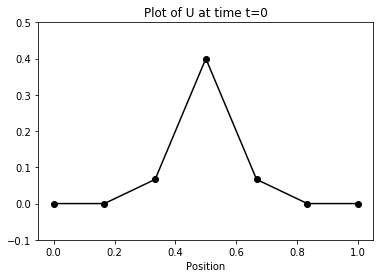

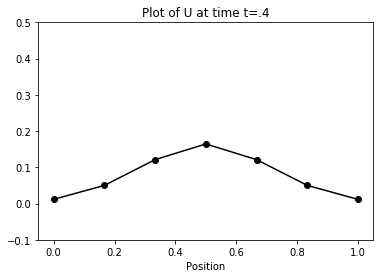

In [13]:
#Define bvp solver
def bvp(a, b, T, f, v, N_x, N_t):
    h = (b-a)/N_x
    k = T/N_t
    lmbda = (v*k)/h**2
    A = np.zeros((N_x+1, N_x+1))
    np.fill_diagonal(A, 1-2*lmbda)
    np.fill_diagonal(A[:-1, 1:], lmbda)
    np.fill_diagonal(A[1:,:-1], lmbda)
    U = np.zeros((N_t+1, N_x+1))
    U[0] = np.array([f(x) for x in np.linspace(a, b, N_x+1)])
    t = np.linspace(0, T, N_t+1)
    for j in range(1, N_t+1):
        U[j] = A@U[j-1]
    return U
#Set initial values
a, b = 0, 1
T = 1
v = .05
f = lambda x: 2*max(.2-abs(x-.5), 0) #Finish this
N_x, N_t = 6, 10
U = bvp(a, b, T, f, v, N_x, N_t)
#Plot the solution at time =0 and time=.4
domain = np.linspace(a, b, N_x+1)
plt.plot(domain, U[0], marker='o', color='black')
plt.ylim(-.1, .5)
plt.xlabel("Position")
plt.title("Plot of U at time t=0")
plt.show()
plt.plot(domain, U[4], marker='o', color='black')
plt.title("Plot of U at time t=.4")
plt.xlabel("Position")
plt.ylim(-.1, .5)
plt.show()

## Problem 2

Solve the specific initial boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method 8.1.
Use 140 subintervals in the $x$ dimension and 70 subintervals in time. Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method 8.1 the CFL condition that must be satisfied is that

 $$\lambda \leq \frac{1}{2}.$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate your results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.

In [16]:
#Create a solver according to the first order method
def first_order(a, b, T, f, v, N_x, N_t):
    h = (b-a)/N_x
    k = T/N_t
    U = np.zeros((N_t+1, N_x+1))
    U[0] = np.array([f(x) for x in np.linspace(a, b, N_x+1)])
    t = np.linspace(0, T, N_t+1)
    for j in range(1, N_t+1):
        for i in range(1, N_x):
            U[j,i] = U[j-1,i] + (v*k)/h**2 * (U[j-1,i+1] - 2*U[j-1,i] + U[j-1,i-1])
    return U


#set initial conditions
a, b = -12, 12
T = 1
f = lambda x: max(1-x**2, 0)
v = 1
N_x, N_t = 140, 70
U = first_order(a, b, T, f, v, N_x, N_t)


<IPython.core.display.Javascript object>


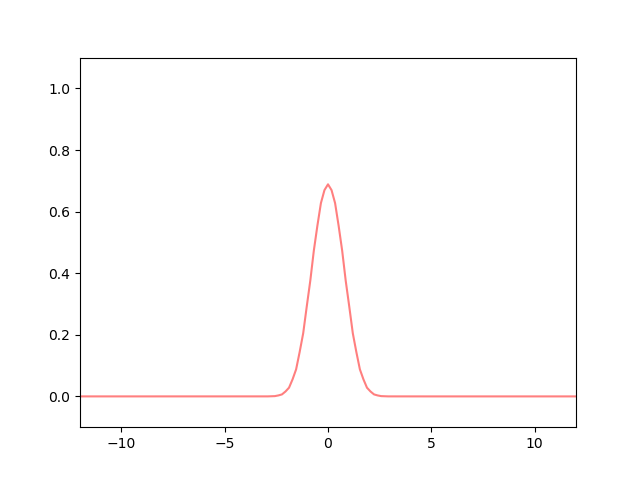

In [19]:
#Plot an animation of the solution over time
t = np.linspace(0, T, N_t+1)
x = np.linspace(a, b, N_x+1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-12,12))
ax.set_ylim((-.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    traj.set_data(x,U[i])
    return traj

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)



<IPython.core.display.Javascript object>


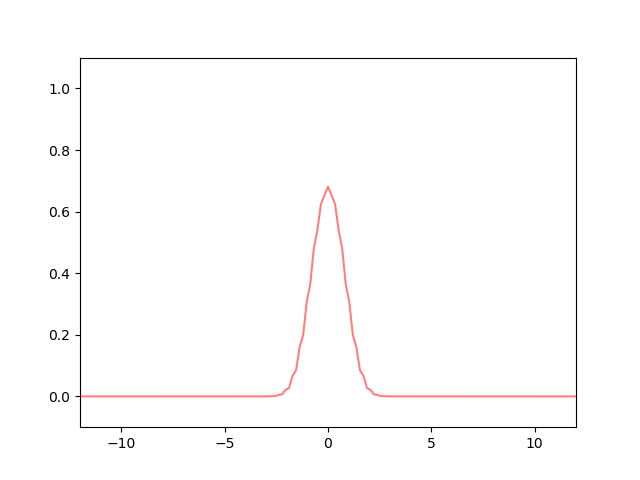

In [20]:
#Plot the same solution with fewer subintervals
N_x, N_t = 140, 66
U = first_order(a, b, T, f, v, N_x, N_t)
t = np.linspace(0, T, N_t+1)
x = np.linspace(a, b, N_x+1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-12,12))
ax.set_ylim((-.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    traj.set_data(x,U[i])
    return traj

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)




## Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 8.4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [26]:
#Code the Crank-Nicholson Method
def c_n(a, b, T, f, v, N_x, N_t):
    h = (b-a)/N_x
    k = T/N_t
    lmbda = (v*k)/h**2
    A = np.zeros((N_x+1, N_x+1))
    np.fill_diagonal(A, 1-2*lmbda)
    np.fill_diagonal(A[1:, :-1], lmbda)
    np.fill_diagonal(A[:-1,1:], lmbda)
    # Setup for matrix B
    B = np.zeros((N_x+1, N_x+1))
    np.fill_diagonal(B, 1+2*lmbda)
    np.fill_diagonal(B[1:, :-1], -lmbda)
    np.fill_diagonal(B[:-1, 1:], -lmbda)
    U = np.zeros((N_t+1, N_x+1))
    U[0] = np.array([f(x) for x in np.linspace(a, b, N_x+1)])
    t = np.linspace(0, T, N_t+1)
    for j in range(1, N_t+1):
        U[j] = la.solve(B, A@U[j-1])
    return U

#Set initial conditions
v = 1
a, b = -12, 12
T = 1
f = lambda x: max(1-x**2, 0)
vectors = list()
#Find the solution for the last time period for several step-sizes
for steps in [(1,20), (2,40), (4,80), (8,160), (16,320), (32,640)]:
    mask = steps[0]*np.arange(21)
    N_x, N_t = steps[1], steps[1]
    U = c_n(a, b, T, f, v, N_x, N_t)
    vectors.append(U[-1][mask])
solution = vectors[-1]



In [28]:
errors = [np.max(np.abs(solution - vector)) for vector in vectors[:-1]]

<IPython.core.display.Javascript object>


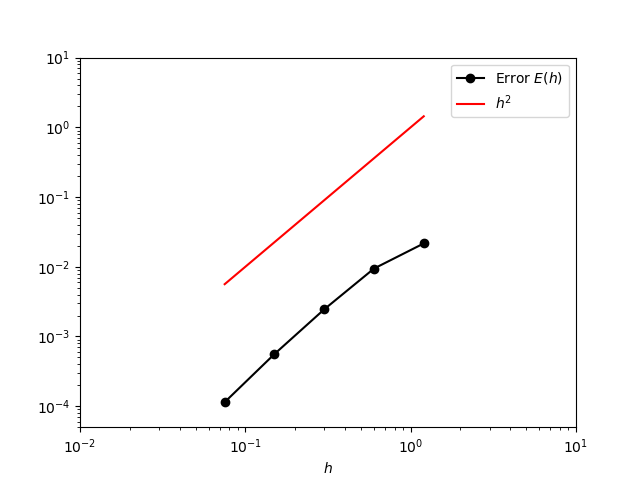

In [44]:
#Plot the errors on a log-log plot
h_list = [((b-a)/steps) for steps in [20, 40, 80, 160, 320]]
h_sq = [i**2 for i in h_list]
plt.loglog(h_list, errors, color='black', marker='o', label="Error $E(h)$")
plt.loglog(h_list, h_sq, color='r', label='$h^{2}$')
plt.legend()
plt.ylim(5e-5, 10)
plt.xlim(10e-3, 10)
plt.xlabel('$h$')
plt.show()